$\def\Segment#1{\overline{#1}}$

# Chapter 15 - Circles

## Definition - Circle

> A **circle** is the locus of points in the plane at a given distance $r$ from a given point $C$.  The given distance $r$ is called the **radius** of the circle and $C$ is called the **center**.

### Theorem 15-1

> A point $P = (x,y)$ is on a circle with center $C = (h,k)$ and radius $r$ if and only if its coordinates satisfy the equation
>
> $$ (x-h)^2 + (y-k)^2 = r^2 $$
>

### Theorem 15-2

> All radii of the same circle are congruent.

## Definition - Congruent Circles

> Two **circles** are **congruent** if and only if their radii are congruent.

## Definition - Interior of Circle

> A point is in the **interior** of a circle if and only if the distance from the center to the point is less than the radius.

## Definition - Exterior of Circle

> A point is in the **exterior** of a circle if and only if the distance from the center to the point is greater than the radius.

### Theorem 15-3

> If three distinct points, $A$, $B$, and $C$ are non-collinear, then there is exactly one circle which contains $A$, $B$, and $C$.

## Definition - Secant

> A **secant** is a line intersecting a circle at two distinct points.

## Definition - Tangent

> A **tangent** is a line intersecting a circle at exactly one point.

## Definition - Chord

> A **chord** is a segment having its endpoints on the circle (i.e., the "inside" of a secant).

## Definition - Diameter

> A **diameter** is a chord containing the center of the circle.

### Program - Tangents to Circles


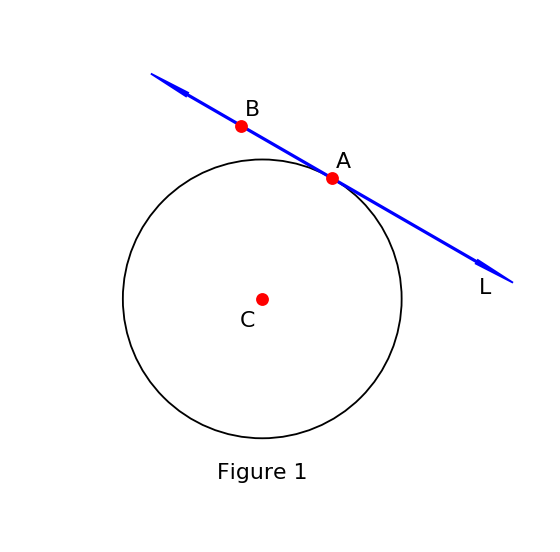

In [1]:
#%
#% Draw a circle and tangent for reference in subsequent theorems.
#%
#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+#%##-####+
%matplotlib inline
import numpy as np

#% This python 3.6.5 package reads rc file but global rcParams never 
#% receives it!  Workaround until better package is installed.

import matplotlib
matplotlib.rc_file_defaults()  #% Rereads ~/.matplotlib/matplotlibrc.

#% Continue with regularly scheduled program.

import matplotlib.pyplot as plt
import matplotlib.path as path
import matplotlib.patches as patches
import matplotlib.lines as lines

#% Set debug True for development or testing.

debug = False

#% Initialize figure with one subplot.
#% Note: Text does not scale with figure resize ("display space?").

figure = plt.figure()     #% figsize=(3,3))
axes   = figure.add_subplot(111)
axes.set_aspect('equal')  #% For circles, not ellipses.

#% Create a circle at origin and add to axes.

C = np.array([0, 0])
r = 2
circle = path.Path.circle(C, r)
#%
#% This looks buggy: if user requests facecolor=None, user gets blue.
#% Workaround with alpha = 0. Maybe we should try patches.Circle...
#%
patch = patches.PathPatch(circle, facecolor=('#00000000'))
axes.add_patch(patch)

#% Pick an angle for tangent point and rotate unit vectors there.

angle = np.pi/3
ux    = np.array([np.cos(angle), np.sin(angle)])
uy    = np.array([-ux[1], ux[0]])

#% Create a tangent line and add it to axes.

A = r * ux          #% Alleged single point of intersection.
h = 1.5 * r         #% Length of arrow. Two arrows make up line.
B = A + (h/2) * uy  #% Second point referenced in theorems.
arrow = patches.Arrow(*A, *(-h*uy), .1, color='blue')
axes.add_patch(arrow)
arrow = patches.Arrow(*A, *(h*uy), .1, color='blue')
axes.add_patch(arrow)

#% Dot and label interesting points.

data = np.array([A, B, C])
axes.plot(data[:,0], data[:,1], 'ro')

def add_text(axes, xy, text='?', halign='center', valign='center'):
    kwargs = dict(
        fontsize = 'large',
        horizontalalignment = halign,  # 'center' shifts right...
        verticalalignment = valign,    # 'center' shifts up...
    )
    if debug:
        kwargs['bbox'] = dict(alpha = 0.3, facecolor = 'green', pad = 1)
    text = axes.text(*xy, text, kwargs)

add_text(axes, A + 0.1 * ux, 'A', 'left', 'bottom')
add_text(axes, B + 0.1 * ux, 'B', 'left', 'bottom')
add_text(axes, C - 0.2 * ux, 'C', 'right', 'top')
add_text(axes, A - 0.9*h*uy - 0.1*ux, 'L', 'right', 'top')
add_text(axes, [0, -2.5], 'Figure 1')

#% Adjust layout and draw plot.
#% Grid may be turned on for development / testing.

axes.set_xlim(-1.5 * r, 2 * r)
axes.set_ylim(-1.5 * r, 2 * r)

if debug:
    axes.set_axis_on()
    axes.minorticks_on()
    axes.grid(True, 'major')
    axes.grid(True, 'minor', linestyle=':')
else:
    axes.set_axis_off()

#% A bit of work, eh?  But pretty when done.

plt.show()

### Theorem 15-4

> A line is tangent to a circle if and only if it is perpendicular to a radius at the "outer end" of the radius.

Book's proof of this theorem has bugs and theorem is needed in Chapter 16 so is proved here.

#### Proof

> Refer to Figure 1 above.  There are two cases to consider.
>
> **Case 1**.  Given a line $L$ that intersects radius $\Segment{CA}$ at point $A$ on a circle with center $C$, if $L$ is perpendicular to $\Segment{CA}$, prove that $L$ must then be tangent to the circle.
>
> Let $B$ be any point on $L$ different from $A$.  Since $L \perp \Segment{CA}$, $\angle CAB$ is a right angle ([Definition of right angle](Chapter10_Angles.ipynb#Definition---Right-Angle)) and $\triangle CAB$ is a right triangle ([Definition of right triangle](Chapter12_IntroToTriangles.ipynb#Definition---Right-Triangle)) with hypotenuse $\Segment{CB}$ ([Definition of hypotenuse](Chapter12_IntroToTriangles.ipynb#Definition---Hypotenuse)) whose length exceeds either leg ([Pythagorean Theorem](Chapter12_IntroToTriangles.ipynb#Theorem-12-3---Pythagorean-Theorem)); that is, $B$ lies *outside* the circle.  Since $B$ was arbitrary, it follows that $A$ is the only point of contact between $L$ and the circle.  This proves that $L$ is a tangent line to the circle.
>
> (Dave, you might reduce anality by placing link directly on relevant text of proof rather than inserting "Definition of this and that" all over.  Proof would read more smoothly.)
>
> **Case 2**.  Given a *tangent* line $L$ that intersects radius $\Segment{CA}$ at point $A$ on circle with center $C$, prove that $L$ is necessarily perpendicular to $\Segment{CA}$; that is, $L \perp \Segment{CA}$.
>
> Let $B$ be the unique point on $L$ such that $\Segment{CB} \perp L$ (implicit in [Definition of point-to-line distance](Chapter08_ParallelPerpendicular.ipynb#Definition---Distance-from-Point-to-Line)).  There are two cases:
>
> 1. $B = A$. Then $(L \perp \Segment{CB}) \wedge (B = A) \Rightarrow L \perp \Segment{CA}$ and the theorem is proved.
> 2. $B \ne A$.  Since $\Segment{CB} \perp L$, $\triangle CBA$ is a right triangle with hypotenuse $\Segment{CA}$.  Since $A$ is on the circle and length $CA > CB$, $B$ must lie *inside* the circle so that $L$ is a [secant](#Definition---Secant).  But this is impossible since $L$ is a tangent line by hypothesis.  Therefore, $B = A$ is the only possibility and the theorem is proved.

$$\oint\qquad\oint\qquad\oint$$

### Theorem 15-5

> No circle contains three collinear points.

### Corollary 15-5.1

> Two distinct circles intersect in at most two different points.

### Corollary 15-5.2

> Two distinct circles will intersect in $0$, $1$, or $2$ points.

## Definition - Concentric Circles

> **Concentric circles** are circles which have the same center.

## Definition - Tangent Circles

> **Tangent circles** have exactly one point in common.  If the points of the interior of one circle lie in the interior of the other, the two circles are **internally tangent** (i.e., a bigger circle contains a smaller one and they just touch at a point).  If no point of the interior of one of the circles is in the interior of the second circle, the circles are **externally tangent**.

### Theorem 15-6

> A radius of a circle bisects a chord (not a diameter) if and only if it is perpendicular to the chord.

### Theorem 15-7

> In the same circle or in congruent circles, chords are congruent if and only if they are equidistant from the corresponding centers of the circles.

### The Problem of Apollonius

Check out this [fun problem](https://en.wikipedia.org/wiki/Problem_of_Apollonius) from Apollonius of Perga (late 3rd – early 2nd centuries BCE) and read more [interesting history](https://en.wikipedia.org/wiki/Analytic_geometry#History).

In [265]:
#- For centering plots, this is borrowed from the lovely creation of
#- Cameron Davidson-Pilon at https://stackoverflow.com/questions/18380168.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")